1.Import packages

In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
import random
import datetime
import time
#from zfel import sase1d_input_part
from zfel import sase1d_input_part

2.Input parameters

In [2]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 200                    # n-sample points along bunch length
z_steps = 200                    # n-sample points along undulator
energy  = 4313.34*1E6               # electron energy [eV]
eSpread = 0#1.0e-4                  # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3400                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
#unduK = 3.5                        # undulator parameter, K [ ]
unduK = np.ones(z_steps)*3.5 #np.arange(3.52,3.48,-0.04/(z_steps-1))#   # tapered undulator parameter, K [ ]

if unduK.shape[0]!=z_steps:
    print('Wrong! Number of steps should always be the same as z_steps')
unduL = 70#30                       # length of undulator [meter]
#radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs

mc2 = 0.51099906E6#510.99906E-3      # Electron rest mass in eV

gamma0  = energy/mc2                                    # central energy of the beam in unit of mc2
    
radWavelength=unduPeriod*(1+unduK[0]**2/2.0)\
                    /(2*gamma0**2)                          # resonant wavelength

dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 'sase'                       # 'sase' or 'seeded'
P0 = 10000*0.0                      # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No
particle_position=None #genfromtxt('./Inputs/particle_position.csv', delimiter=',') # or None  
# particle information with positions in meter and eta,\
# if we want to load random particle positions and energy, then set None
hist_rule='square-root'             # 'square-root' or 'sturges' or 'rice-rule' or 'self-design', number \
                                    #  of intervals to generate the histogram of eta value in a bucket

In [3]:
'''
Put input parameters into a inp_struct dict, for 1D FEL run
'''
inp_struct={'Nruns':Nruns,'npart':npart,'s_steps':s_steps,'z_steps':z_steps,'energy':energy,'eSpread':eSpread,\
            'emitN':emitN,'currentMax':currentMax,'beta':beta,'unduPeriod':unduPeriod,'unduK':unduK,'unduL':\
            unduL,'radWavelength':radWavelength,'dEdz':dEdz,'iopt':iopt,'P0':P0,'constseed':constseed,'particle_position':particle_position,'hist_rule':hist_rule}

3.1D FEL run

In [4]:
%load_ext autoreload
%autoreload
'''
Use sase function in sase1d.py to run 1D FEL
'''
#z,power_z,s,power_s,rho,detune,field,\
#field_s,gainLength,resWavelength,\
#thet_out,eta_out,bunching,spectrum,freq,Ns,history=sase1d_input_part.sase(inp_struct)
output = sase1d_input_part.sase(inp_struct)

4.Print or plot the output

Text(0, 0.5, 'spectrum (W)')

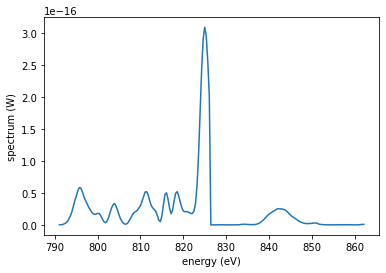

In [6]:
# plot spectrum

history = output['history']

freq =history['freq']
spectrum = history['spectrum']
plt.plot(freq,spectrum[1:,-1])
plt.xlabel('energy (eV)')
plt.ylabel('spectrum (W)')

In [ ]:
%load_ext autoreload
%autoreload
if iopt == 5:
    sase1d_input_part.plot_log_power_z(history)
    sase1d_input_part.plot_power_s(history)
    sase1d_input_part.plot_phase_space(history)
else:
    sase1d_input_part.plot_log_power_z(history)
    sase1d_input_part.plot_phase_space(history)

In [ ]:
print(bunching[:,0])
print(np.sqrt(np.mean(np.absolute(bunching[:,0])**2)))
print(1/np.sqrt(Ns))

In [ ]:
print(rho)
print(detune)
print(gainLength)
print(resWavelength)
print(thet_out,eta_out)

In [ ]:
print(z)
print(power_z)
print(s)
print(power_s)
print(field)
print(field_s)
print(bunching)